# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [3]:
!pip install seaborn


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [46]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [47]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'split_valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 12284 files belonging to 38 classes.


In [49]:
# Test veri kümesi
test_set = tf.keras.utils.image_dataset_from_directory(
    'split_test',  # Burada 'test' dizininizin yolu olmalı
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,  # Test verisi karıştırılmaz, sıralı olmalıdır
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5289 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [50]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [51]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [52]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [53]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [54]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [55]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [56]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [57]:
cnn.add(tf.keras.layers.Flatten())

In [58]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [59]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [60]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [61]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [62]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=20)

Epoch 1/20


2025-05-09 10:48:40.761910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 262s 116ms/step - accuracy: 0.3650 - loss: 2.2941 - val_accuracy: 0.7562 - val_loss: 0.8129
Epoch 2/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 252s 115ms/step - accuracy: 0.7940 - loss: 0.6898 - val_accuracy: 0.8391 - val_loss: 0.5597
Epoch 3/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 250s 114ms/step - accuracy: 0.8648 - loss: 0.4550 - val_accuracy: 0.9039 - val_loss: 0.3146
Epoch 4/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 251s 114ms/step - accuracy: 0.8966 - loss: 0.3493 - val_accuracy: 0.9249 - val_loss: 0.2701
Epoch 5/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 250s 114ms/step - accuracy: 0.9178 - loss: 0.2851 - val_accuracy: 0.9221 - val_loss: 0.3213
Epoch 6/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 249s 113ms/step - accuracy: 0.9322 - loss: 0.2427 - val_accuracy: 0.9254 - val_loss: 0.3089
Epoch 7/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 251s 114ms/step - accuracy: 0.9421 - loss: 0.2127 - val_accuracy: 0.9426 - val_loss: 0.2231
Epoch 8/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 251s 114ms/step - accuracy: 0.9

## Evaluating Model

In [64]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 0.9843 - loss: 0.0779
Training accuracy: 0.9852194786071777


In [65]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

384/384 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9568 - loss: 0.3075
Validation accuracy: 0.9566102623939514


### Saving Model

In [66]:
cnn.save('trained_plant_disease_model.keras')

In [67]:
#cnn.save("trained_plant_disease_model.h5")


In [68]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5572231411933899,
  0.8157479166984558,
  0.8762359023094177,
  0.9041610360145569,
  0.9236218929290771,
  0.9372217059135437,
  0.945529580116272,
  0.9525286555290222,
  0.9608080387115479,
  0.9622732996940613,
  0.9664698839187622,
  0.9688171744346619,
  0.9705953598022461,
  0.9739668965339661,
  0.9762572050094604,
  0.9766697883605957,
  0.9773810505867004,
  0.979173481464386,
  0.9806956648826599,
  0.9790312647819519],
 'loss': [1.5373609066009521,
  0.6138744354248047,
  0.41860201954841614,
  0.3286159336566925,
  0.2631781995296478,
  0.22812838852405548,
  0.20237591862678528,
  0.17972011864185333,
  0.14994454383850098,
  0.15029357373714447,
  0.1365690529346466,
  0.13617835938930511,
  0.1327502727508545,
  0.11777929216623306,
  0.10553660243749619,
  0.10979180783033371,
  0.1110658124089241,
  0.1084156334400177,
  0.11026164889335632,
  0.12300282716751099],
 'val_accuracy': [0.7561869025230408,
  0.8391403555870056,
  0.9038587212562561,
  0.92

In [69]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [70]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

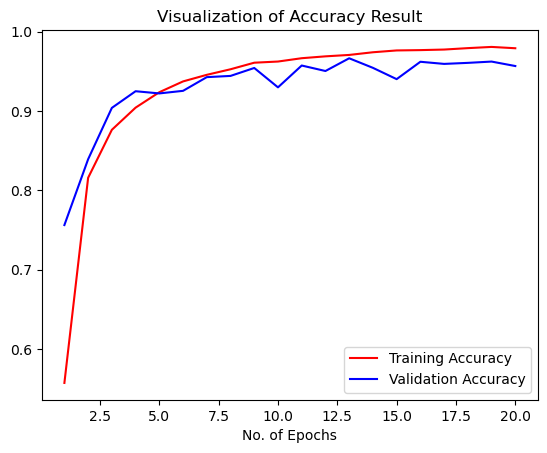

In [71]:
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


In [72]:
# Loss grafiği
plt.plot(history.history['loss'], label='Training Loss', color='orange')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

## Some other metrics for model evaluation

In [73]:
class_name = validation_set.class_names

In [74]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'split_test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5289 files belonging to 38 classes.


In [75]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

5289/5289 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step


In [76]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

2025-05-09 12:20:34.941913: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [77]:
Y_true

<tf.Tensor: shape=(5289,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [78]:
predicted_categories

<tf.Tensor: shape=(5289,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 30, 37])>

In [79]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [80]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.96      0.97       152
                                 Apple___Black_rot       0.99      0.97      0.98       150
                          Apple___Cedar_apple_rust       0.99      0.98      0.98       132
                                   Apple___healthy       0.98      0.94      0.96       151
                               Blueberry___healthy       0.98      0.95      0.97       137
          Cherry_(including_sour)___Powdery_mildew       0.96      0.98      0.97       127
                 Cherry_(including_sour)___healthy       1.00      0.97      0.99       137
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.90      0.91       123
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       144
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.94      0.

### Confusion Matrix Visualization

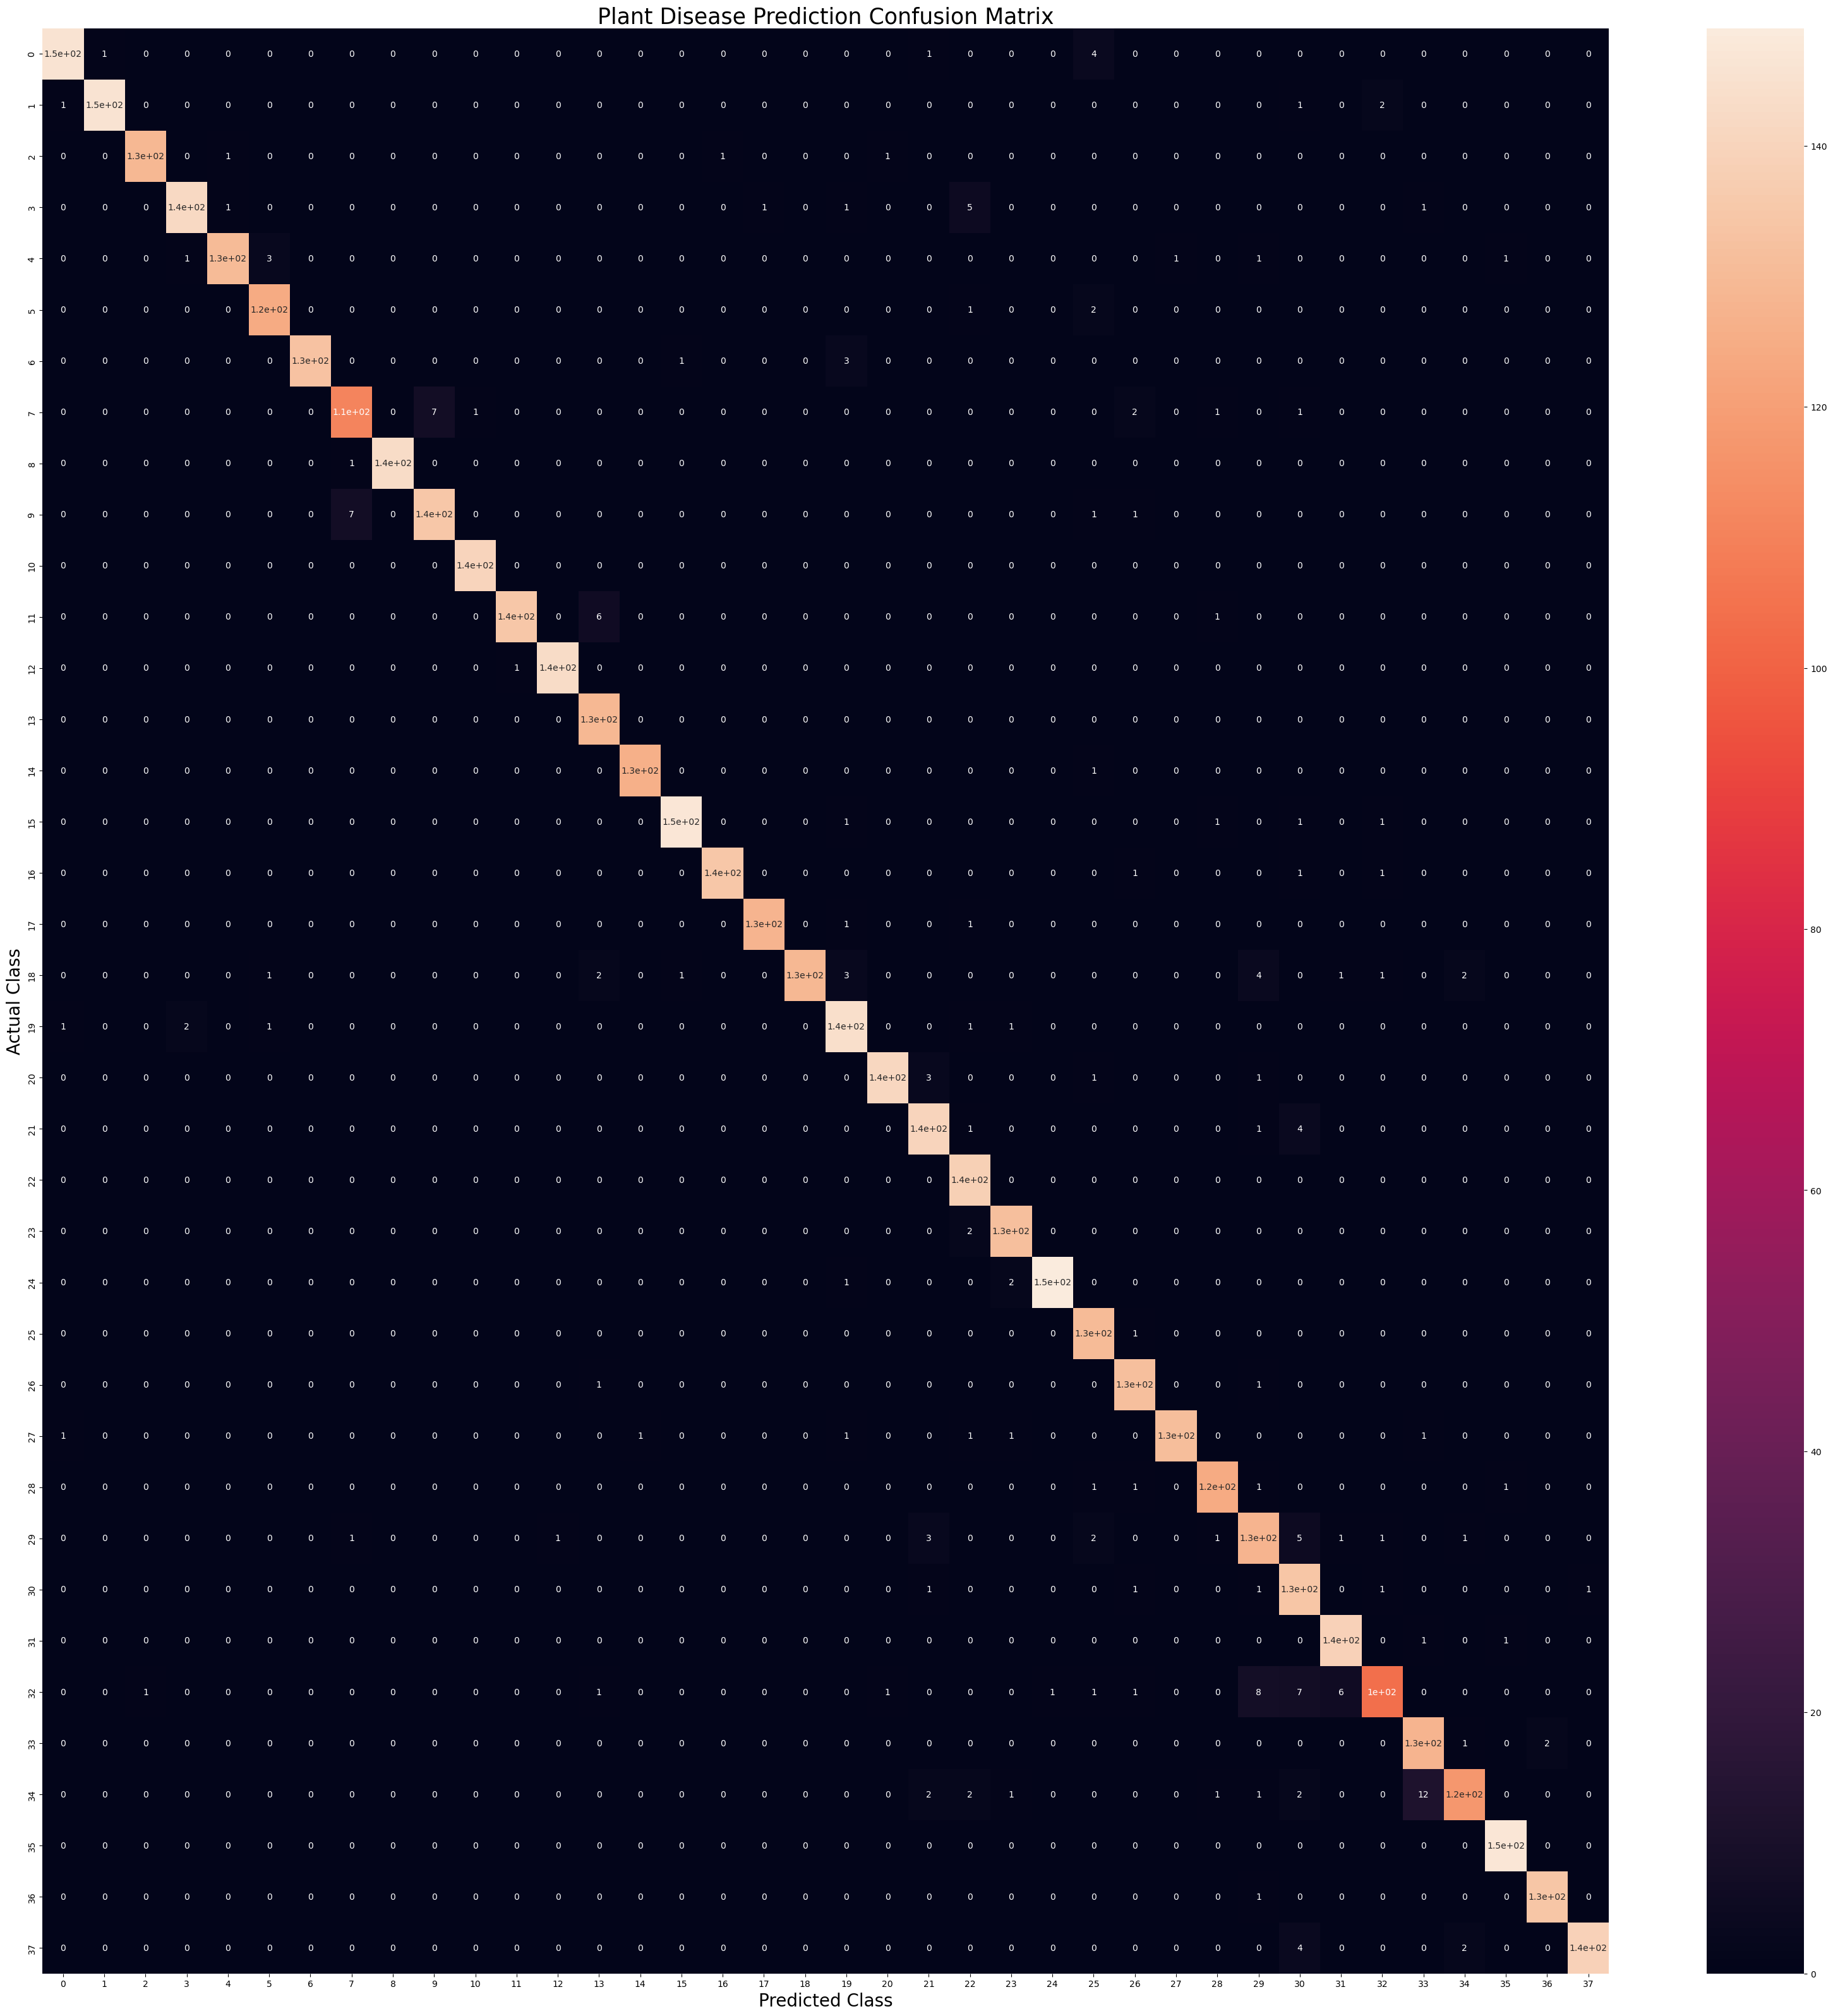

In [81]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()